# 데이터 생성

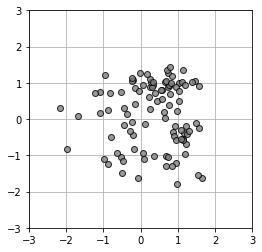

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
N = 100
K = 3
T3 = np.zeros((N, 3), dtype = np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
X_col = ['cornflowerblue', 'black', 'white']
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]])
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])
Pi = np.array([0.4, 0.8, 1])
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T3[n, k] = 1
            break
            
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k]
                   + Mu[T3[n, :] == 1, k])

def show_data(x):
    plt.plot(x[:, 0], x[:, 1], linestyle='none',
             marker='o', markersize=6,
             markeredgecolor='black', color='gray', alpha=0.8)
    plt.grid(True)
    
plt.figure(1, figsize=(4, 4))
show_data(X)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()
np.savez('data_ch9.npz', X = X, X_range0=X_range0,
         X_range1=X_range1)
    


데이터를 무작위로 생성하였다.   
임의로 생성된 wk와 Pi의 크기에따라 3가지로 나누었다.   
wk < Pi의 0번 인덱스 = 라벨은 0  
wk < Pi의 1번 인덱스 = 라벨은 1
나머지 라벨은 2

target과 데이터X의 관계   

(임의의 수 * Sig) + Mu = X이다.    
예를 들어 target이 0번 인덱스이면   
임의의 수 * Sig의 0번 행, 0번열 + Mu의 0번 행, 0번 열 = X_0의 데이터   
임의의 수 * Sig의 0번 행  1번열 + Mu의 0번 행, 1번 열 = X_1의 데이터    

이런 식으로 2차원 데이터를 만들었다.  


# K-means 알고리즘

k-평균 알고리즘(K-means clustering algorithm)은 주어진 데이터를 k개의 클러스터로 묶는 알고리즘이다.     
- 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작한다. 
- 이 알고리즘은 자율 학습의 일종으로, 레이블이 달려 있지 않은 입력 데이터에 레이블을 달아주는 역할을 수행한다.     
- 이 알고리즘은 EM 알고리즘을 이용한 클러스터링과 비슷한 구조를 가지고 있다.

3가지 과정   
1. 클러스터링의 수 K개를 정의
2. K개에 따른 임의의 중심점을 설정
3. 중심점을 기준으로 클러스터링하기(유클리드 거리사용) 
4. 군집화한 집단끼리 평균 측정
5. 평균과 중심이 다르면 평균을 또다른 중심으로 설정
6. 평균과 중심이 같으면 클러스터링 종료

K평균 클러스터링은 입력 값으로 K를 취하고 K개의 군집으로 만든다.   
군집안에서 유사성은 높게, 서로 다른 군집 간 유사성은 낮게 해야한다.

K = 3으로 군집화를 할 예정이다.

장점:   
- 군집분석은 그 자체가 대용량 데이터에 대한 탐색적 인 기법으로서, 주어진 데이터의 내부구조에 대한 사전적인 정보 없이 의미 있는 자료구조를 찾아낼 수 있는 방법
- 군집이 구형과 같은 모양 인 경우 데이터 구조를 캡처하는 데 유용하다. 
- 분석을 위해서는 기본적으로 관찰치 간의 거리를 데이터형태에 맞게만 정의하면, 거의 모든 형태의 데이터에 대하여 적용이 가능한 방법
  (거리나, K의 개수를 잘 정의하면 많은 데이터에 적용가능)

단점: 
- 데이터의 개수가 많을 경우 군집화의 정확도가 떨어진다.
- 반복 횟수가 많아질수록 수행시간이 오래 걸린다. 
- 몇 개의 군집으로 정하기가 어렵다.
- k-평균 군집분석에서는 사전에 정의된 군집수를 기준 으로 동일한 수의 군집을 찾게 되므로,  
  만일 군집수 k 가 원래 데이터구조에 적합하지 않으면 좋은 결과를 얻을 수 없음
- 사전 정보 없이 의미 있는 자료구조를 찾기 때문에 결과 해석이 어렵다.   
- 데이터의 구조가 구형이 아닌 복잡한 형태일수록 정확도가 떨어진다. (유클리드 거리라서 구형이 효과적)
- outlier(멀리떨어진 데이터)에 민감하다. (분류 문제에서 선형 식을 사용하지 않은 이유)

출처: https://needjarvis.tistory.com/140 [자비스가 필요해]

활용 방안:
- Data Mining에서 데이터 분류 및 군집 알고리즘으로 활용
- 트랜드 또는 성향이 불분명한 시장을 분석하는 경우
- 시장과 고객 분석, 패턴인식, 공간데이터 분석, Text Mining 등
- 최근에는 패턴인식, 음성인식의 기본 알고리즘으로 활용

### 변수의 준비와 초기화

데이터가 2차원이기 때문에 중심의 좌표도 2차원이다.

3개의 임의의 중심벡터를 설정한다.   
mu0 = [-2, 1], mu1 = [-2, 0], mu2 = [-2, -1]

클래스의 지시변수(R)은 one-hot 벡터로 되어있다.  
인덱스가 class에 해당하는 경우는 1, 아니면 0을 가지게 된다.  
0번째 인덱스에 속하는 경우: [1, 0, 0]   
1번째 인덱스: [0, 1, 0]   
2번째 인덱스: [0, 0, 1]

In [2]:
#초기 벡터 설정  
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
#R을 초기화 하기, 모두 0번째 인덱스에 1이라고 가정
R = np.c_[np.ones((N, 1), dtype = int), np.zeros((N, 2), dtype = int)]

np.c_[a,b] 란 a란 array와 b란 array를 가로로 붙인다는 뜻이다.  
이때 라벨 값은 항상 정수이기 때문에 dtype = int라고 꼭 설정해야한다.   
(예를 들어 사람을 0이라하고 원숭이를 1이라 하면 0.5는 사람반 원숭이반인 혼종이다.)

In [3]:
# 위와 같은 코드이다.
R1 = np.zeros((N, 3), dtype = int)
for i in range(N):
    R1[i, 0] =1 

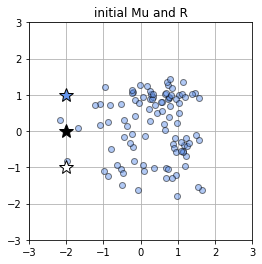

In [4]:
def show_prm(x, r, mu, col):
    for k in range(K):
        # 데이터 분포의 묘사
        plt.plot(x[r[:, k] == 1, 0], x[r[:, k] == 1, 1],
                 marker='o',
                 markerfacecolor=X_col[k], markeredgecolor='k',
                 markersize=6, alpha=0.5, linestyle='none')
        # 데이터의 평균을 "별표"로 묘사
        plt.plot(mu[k, 0], mu[k, 1], marker='*',
                 markerfacecolor=X_col[k], markersize=15,
                 markeredgecolor='k', markeredgewidth=1)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.grid(True)


# ------------------------------
plt.figure(figsize=(4, 4))
R = np.c_[np.ones((N, 1)), np.zeros((N, 2))]
show_prm(X, R, Mu, X_col)
plt.title('initial Mu and R')
plt.show()

군집화를 하면서 카테고리에 분류를 할 예정이다.  
데이터 100개는 3개의 열중 어느 열에 속할지 분류할 예정이다.  

R이 어디에 속하는지 따라 X_col[k]를 이용해 색깔이 달라진다.   
X_col = ['cornflowerblue', 'black', 'white']    
R이 0번째 인덱스가 1이면 cornflowerblue색깔, 1번째가 1이면 검은색,  
2번째면 하얀색으로 나온다.    

처음으로 정의한 Mu는 별 모양으로 표기해야 한다. marker =' * '을 이용 

### 군집화를 시작하기

100개의 데이터를 별(클러스터의 중심)과의 거리에 따라 군집화를 한다.   
- MSE를 사용하였다.   
- 0번째 별과 데이터의 거리, 1번째 별과 데이터의 거리, 2번째 별과 데이터의 거리 구하기
- R을 갱신, R의 3개의 열중 제일 짧은 거리를 가진 인덱스 번호에 1을 부여, 나머지는 0

r이란 벡터는 n,3의 형태로 되어있다. n은 데이터의 번호이다. 여기서는 100개라서 100개의 행이다.   
열의 경우 3가지로 분류하기 때문에 3개의 열을 가지고 있다.

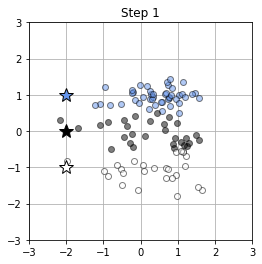

In [5]:
def step1_kmeans(x0, x1, mu):
    N = len(x0)
    r = np.zeros((N, K)) #R을 100개의 행, 3개의 열로 이루어진 0벡터 형성
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = (x0[n] - mu[k, 0])**2 + (x1[n] - mu[k, 1])**2
        r[n, np.argmin(wk)] = 1 #거리가 제일 짧은 인덱스가 r의 인덱스가 된다. r = 0 이면 파랑, r = 1이면 검정, r = 2면 하양 
    return r


plt.figure(figsize=(4, 4))
R = step1_kmeans(X[:, 0], X[:, 1], Mu)
show_prm(X, R, Mu, X_col)
plt.title('Step 1')
plt.show()

### 새로운 Mu를 결정

분류된 라벨끼리 평균을 구하여 새로운 중심좌표를 설정한다.

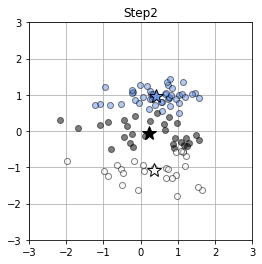

In [6]:
def step2_kmeans(x0, x1, r):
    mu = np.zeros((K, 2)) #mu를 [0, 0]으로 다시 초기화
    for k in range(K):   
        mu[k, 0] = np.sum(r[:, k] * x0) / np.sum(r[:, k]) #x0좌표의 평균 구하기
        mu[k, 1] = np.sum(r[:, k] * x1) / np.sum(r[:, k]) #x1좌표의 평균 구하기
    return mu


# ------------------------------
plt.figure(figsize=(4, 4))
Mu = step2_kmeans(X[:, 0], X[:, 1], R)
show_prm(X, R, Mu, X_col)
plt.title('Step2')
plt.show()

새로운 Mu0, Mu1, Mu2를 구하기   

Mu0의 x좌표와 y좌표를 새로 구하기: mu[k, 0]은 0차원 데이터를 의미한다. 여기서 k는 카테고리 넘버이다.   
r[:, k] * x0의 의미는 r[:, 0]이면 r = [1, 0, 0]을 의미한다. 0으로 분류된 x0의 값들을 살리고 나머지는 0으로 보낸다.
그다음에 np.sum(r[:0])를 함으로써, 

mu[k, 1]은 1차원 데이터를 의미한다. 

R에 속하는 좌표끼리 평균을 구해 새로운 중심을 설정한다.   
여기서 X[:, 0], X[:, 1]은 각각 X의 0차원 데이터, X의 1차원 데이터를 뜻한다. 

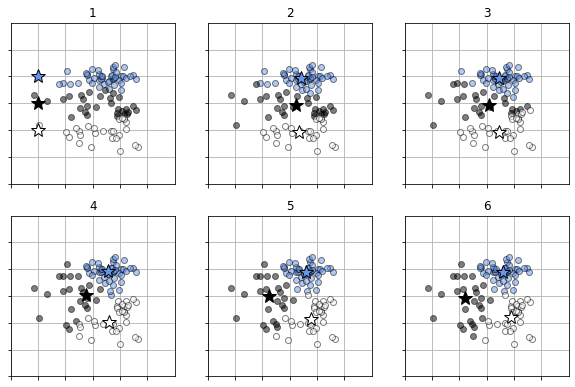

In [7]:
plt.figure(1, figsize=(10, 6.5))
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
max_it = 6 # 반복 횟수
for it in range(0, max_it):
    plt.subplot(2, 3, it + 1)
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)
    show_prm(X, R, Mu, X_col)
    plt.title("{0:d}".format(it + 1))
    plt.xticks(range(X_range0[0], X_range0[1]), "") #plt의 X좌표와 Y좌표 표시 안하기
    plt.yticks(range(X_range1[0], X_range1[1]), "")
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)
plt.show()

6번 동안 수행한 모습이다.

### KNN의 평가 방법: 왜곡 척도

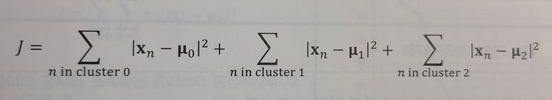

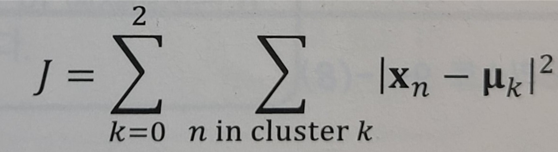

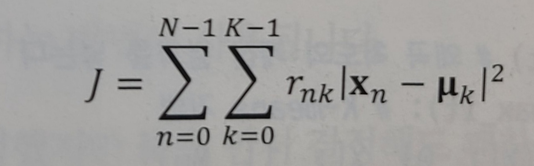

r은 지시벡터이다.   
이 데이터의 의미: (데이터-군집의 중심)^2    
앞의 r의 용도: 군집화한 뒤 그룹 내에서 중심-데이터의 제곱을 하려고 만들었다.  
- r = 0인 경우, 파란색 그룹 안에서 파란색의 중심과 파란색으로 라벨화가 된 데이터간의 유클리드 거리의 합
- r = 1인 경우, 검은색 그룹 안에서 검은색의 중심과 검은색으로 라벨화가 된 데이터간의 유클리드 거리의 합
- r = 2인 경우, 하얀색 그룹 안에서 하얀색의 중심과 하얀색으로 라벨화가 된 데이터간의 유클리드 거리의 합
 

In [8]:
def distortion_measure(x0, x1, r, mu):
    # 입력은 2차원으로 제한하고 있다
    N = len(x0)
    J = 0
    for n in range(N):
        for k in range(K):
            J = J + r[n, k] * ((x0[n] - mu[k, 0])**2
                               + (x1[n] - mu[k, 1])**2)
    return J


# ---- test
# ---- Mu와 R의 초기화
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]
distortion_measure(X[:, 0], X[:, 1], R, Mu)

771.7091170334878

[627.54  73.39  70.39  57.59  48.31  47.28  46.86  46.86  46.86  46.86]


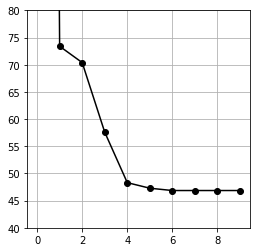

In [9]:
N=X.shape[0]
K=3
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]
max_it = 10
it = 0
DM = np.zeros(max_it) # 왜곡 척도의 계산 결과를 넣는다
for it in range(0, max_it): # K-means 법
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)
    DM[it] = distortion_measure(X[:, 0], X[:, 1], R, Mu) # 왜곡 척도
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)
print(np.round(DM, 2))
plt.figure(2, figsize=(4, 4))
plt.plot(DM, color='black', linestyle='-', marker='o')
plt.ylim(40, 80)
plt.grid(True)
plt.show()

In [10]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [11]:
import numpy as np
wk = np.load('data_ch9.npz')
X = wk['X']
X_range0 = wk['X_range0']
X_range1 = wk['X_range1']

Elbow 척도

# 가우시안 혼합모델

### 확률의 개념을 도입

어떤 데이터가 각 클래스에 속할 확률을 도입한다.

K-means 기법은 데이터 점이 반드시 클러스터에 할당되지만,  
같은 클러스터로 분류된 데이터 내부에서 클러스터 중심 벡터로부터 가까운 데이터가 있고 먼 데이터가 있다.   
이에 따라 특정 클러스터 중심벡터로 부터 먼 데이터의 경우 또 다른 클러스터의 데이터일 확률도 존재한다.   
확률적 클러스터링은 입력 데이터에 대한 클러스터를 분류하되, 입력 데이터들의 각각에 대한 전체 클러스터의 종류에 속할 확률,    
다시말해, 다른 클러스터링에 속할 확률까지 고려한 클러스터링 기법입니다.   

- 전체 클러스터에 대한 입력데이터의 클러스터 확률을 부담률(responsibility)이라고 하며 γ(감마)로 표기힌다.
- 부담률의 합은 1이어야 한다.   
ex) [0.5, 0.3, 0.2]   0번째 인덱스에 속할 확률은 50% 1번째에 속할 확률은 30%, 나머지 라벨은 20%이다.  
- 입력 데이터에 대한 클러스터를 분류하는 행렬은 Z로 표기하며, 앞서 K-means의 R과 거의 같은 역할이다.


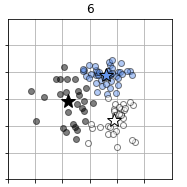

아까 KNN알고리즘에서 수행 6번째로 군집화한 모습을 가져왔다.   
우리는 곤충을 분류하는 작업을 하고있으며, 그래프의 x축이 곤충의 질량을 뜻하고 y축이 곤충의 크기라고 가정.   
2차원 입력데이터로 3개의 클러스터가 있는 것을 발견하였다.  
모든 곤충은 클러스터의 너머에 0, 1, 2라는 하나의 변종에 속하며, 변종의 클래스에 따라 질량과 크기가 대략 정해진다는 것을 알 수 있다.  
예시) 우리가 백인이라는 말을 들었을때, 노란 머리카락, 커다란 키를 연상할 것이며 황인 이라면 검은색 머리카락이 결정되는 것과 비슷

여기서 우리가 0, 1, 2라는 종의 정체를 모르는데 데이터에 영향을 준 변수이기 때문에 잠재변수라고 부른다.  

잠재 변수는 구체적으로 기록, 선언 또는 명시되지 않은 변수입니다.    
- 통계 분석, 컴퓨터 과학 및 기타 영역에서 잠재 변수는 어떤 이유로 든 프로그램 범위 내에서    
  구체적으로 정의되지 않은 항목을 나타낸다.
- 다른 변수를 통해서 간접적으로만 측정이 가능한 변수이다.

잠재변수를 알아두면 좋은 이유는 무엇일까? 우리가 라벨링하지 않은 데이터를 군집화 함으로서 잠재변수를 찾으면?    
잠재변수로 데이터가 어떻게 생길지 유추가 가능해질 것이다.      
잠재변수를 통해 데이터간의 보이지 않은 규칙을 파악가능, 보이지 않는 데이터를 잘 예측할 것이다.

잠재변수가 이해가 안된다면?) 인공지능이 8명의 학부연구생의 데이터를 보고 김주혜 송승헌 임종수 / 강민준 이상원 서정현/ 김민식 장서윤    
3가지 그룹으로 나눴는데 나누고 난뒤에 그룹의 이름을 못정함 -> 이것이 잠재변수이다. 

잠재 변수를 3차원으로 표현 z가 0번째에 속하면 z = [1, 0, 0]이다. z가 1번째에 속하면 z = [0, 1, 0] z가 2에 속하면 z = [0, 0, 1] (R과 비슷)    
z는 속하면 1, 속하지 않으면 0이다.

$\gamma = P(z_{nk} = 1 |x_n)$

이 식은 x에 속하는 데이터가 명시하지 않은 z의 특정한 카테고리에 속할 확률을 뜻한다. $\gamma$는 부담률이라고 표현한다. 

### 가우시안 혼합모델

가우스 분포를 설명하기 위해 먼저 알면 좋은 것들)
1. 분포  
데이터가 제각각인 수치로 나타나는 것을 '데이터 분포' 라고 한다.
그리고 데이터 분포의 특징이나 반복되는 것을 설명하기 위해 평균값, 표준편차 등이 활용된다.     
그런데 이런 제각각인 데이터들도 가만 따지고 보면 어떤 패턴(분포)을 보이는 경우가 있다.   
그중 대표적인 분포인 정규분포는 자연연상에서 관측되는 데이터들 속에 자주 나온다.     
즉 데이터는 언뜻 보면 아무 의미 없는것 같지만, 만약 어떤 분포를 따르는 잘 알려진 현상(상황)이라면   
이는 분포를 통해 다른 현상들을 해석하거나 예측할 수 있게 되는 것이다.


출처: https://datacookbook.kr/54 [DATA COOKBOOK]

2. 중심극한 정리

동일한 확률분포를 가진 독립 확률 변수 n개의 평균의 분포는 n이 적당히 크다면 정규분포에 가까워진다는 정리이다.   

린데베르그-레비 중심극한정리   
- 확률 변수들이 서로 독립적이고,
- 같은 확률 분포를 가지고,
- 그 확률 분포의 기댓값 μ와 표준편차σ가 유한하다면,     
N 개의 확률 변수가 어떤 확률 분포를 따르든지 상관없이 N 이 충분이 크다면 N의 평균과 분산은 가우시안 분포를 따름.

https://ko.wikipedia.org/wiki/%EC%A4%91%EC%8B%AC_%EA%B7%B9%ED%95%9C_%EC%A0%95%EB%A6%AC

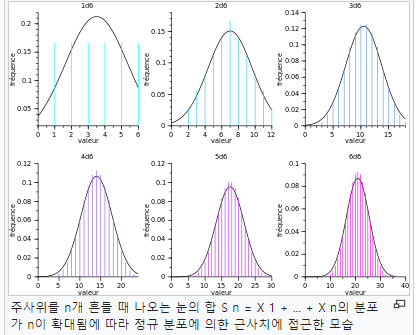

Gaussian Mixture Model (GMM)은 이름 그대로 2차원 Gaussian 분포가 여러 개 혼합된 clustering 알고리즘이다.    
현실에 존재하는 복잡한 형태의 확률 분포를 K개의 Gaussian distribution을 혼합하여 표현하자는 것이 GMM의 기본 아이디어이다.    
이때 K는 데이터를 분석하고자 하는 사람이 직접 설정해야 한다.


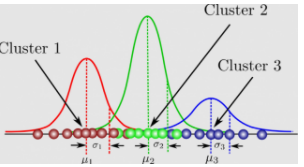

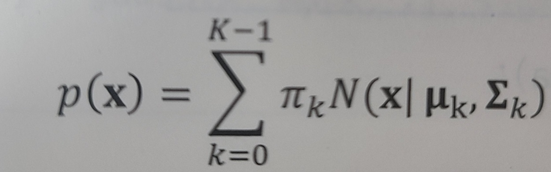

가우시안 모델에는 3가지 요소가 존재한다.  
1. 가우스 분포의 중심을 나타내는 중심벡터    
2. 분포의 퍼짐을 나타내는 공분산 행렬
3. 각 가우스의 크기의 비율을 나타내는 혼합계수 $\pi$(얘는 합이 1이다.)

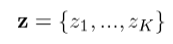

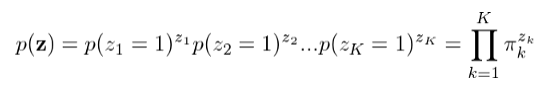

우리가 확률을 구하는 것이기 때문에 카테고리에 해당하는 확률을 전부다 곱한 것을 기억할 것이다.    
이때 z는 속한다와 속하지 않는다면 0과 1이라는 점을 기억하자.

In [12]:
import numpy as np
wk = np.load('data_ch9.npz')
X = wk['X']
X_range0 = wk['X_range0']
X_range1 = wk['X_range1']

In [13]:
def gauss(x, mu, sigma):
    N, D = x.shape
    c1 = 1 / (2 * np.pi)**(D / 2)
    c2 = 1 / (np.linalg.det(sigma)**(1 / 2))
    inv_sigma = np.linalg.inv(sigma)    
    c3 = x - mu
    c4 = np.dot(c3, inv_sigma)
    c5 = np.zeros(N)
    for d in range(D):
        c5 = c5 + c4[:, d] * c3[:, d]
    p = c1 * c2 * np.exp(-c5 / 2)
    return p

In [14]:
x = np.array([[1, 2], [2, 3], [0, 1]])
mu = np.array([1, 2])
sigma = np.array([[1, 0], [0, 1]])
print(gauss(x, mu, sigma))

[0.15915494 0.05854983 0.05854983]


이 숫자들은 무엇일까? 간단하다 종모양 그래프에서 높이가 얼마나 높은지 표현했을 뿐이다!

근데 중요한 것이 있다. 확률은 아니다!   
연속 확률 변수의 분포를 설명하려면 특정한 값이 아니라 구간을 지정하여 확률을 설명해야 한다.    
예를 들어 위와 같은 시계바늘의 예에서는 다음과 같은 분포의 묘사가 가능하다.     

시계 바늘이 12시와 1시 사이에 있을 확률은 1/12   
시계 바늘이 1시와 3시 사이에 있을 확률은 2/12 = 1/6   
시계 바늘이 6시와 9시 사이에 있을 확률은 3/12 = 1/4    
이 방법의 단점 중 하나는 분포를 설명하는데 범위를 지정하는 두 개의 숫자가 필요하다는 점이다.    

왜 데이터는 한개인데 혼합가우시안을 사용했을까? 입력데이터가 2차원이기 때문이다.

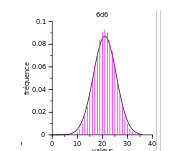

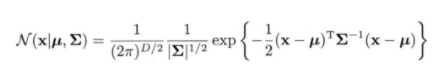

                                                        C1     C2                c4           C3

서로 다른 의미를 지닌 특징간의 상관관계에 따라 거리를 조정하기 위하여,

공분산 행렬(Covariance matrix)이라는 개념을 사용했다.


C3, C4은 무엇일까?


이 식의 정체: 마할라노비스거리    
마할라 노비스 거리란 데이터의 밀도를 고려한 거리척도 이다.    
데이터의 특징별 상호 관계를 표현할 때 사용     
일반적으로 변수가 많은 데이터에서 두 데이터 간의 제대로 된 거리를 파악하기 위해 고려하는 거리이다.     
분산과 평균을 이용한 거리라서 거리를 파악하는데 효과적이다. 



출처) https://wiserloner.tistory.com/1089

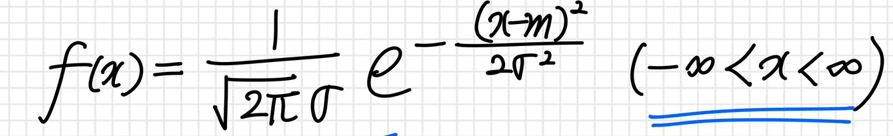

가우시안 혼합 모델

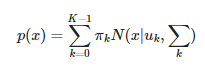

가우시안을 여러개를 사용하는 것을 가우시안 혼합모델이라고 한다.

여기서 $\pi$는 가우스의 상대적인 크기를 의미한다.

단순히 표현하면 가우스함수에 넣은 데이터의 값 * 가우스끼리의 상대적인 크기

In [15]:
# 혼합 가우시안 모델 ----------------------
def mixgauss(x, pi, mu, sigma):
    N, D = x.shape
    K = len(pi)
    p = np.zeros(N)
    for k in range(K):
        p = p + pi[k] * gauss(x, mu[k, :], sigma[k, :, :])
    return p

In [16]:
x = np.array([[1, 2], [2, 3], [0, 1]])
pi = np.array([0.3, 0.7])
mu = np.array([[1, 1], [2, 2]])
sigma = np.array([[[1, 0], [0, 1]], [[2, 0], [0, 2]]])
print(mixgauss(x, pi, mu, sigma))

[0.0723422  0.04730177 0.04491923]


혼합 가우시안을 그래프로 그리기

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
# 혼합 가우스 등고선 표시 ----------------------
def show_contour_mixgauss(pi, mu, sigma):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn * xn, 1))]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn, xn)
    f = f.T
    plt.contour(x0, x1, f, 10, colors='gray')


# 혼합 가우스 3D 표시 ---------------------------
def show3d_mixgauss(ax, pi, mu, sigma):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn * xn, 1))]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, rstride=2, cstride=2, alpha=0.3,
                    color='blue', edgecolor='black')

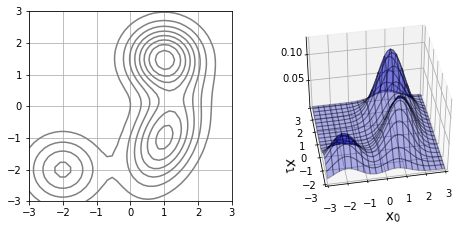

In [18]:
pi = np.array([0.2, 0.4, 0.4])
mu = np.array([[-2, -2], [-1, 1], [1.5, 1]])
sigma = np.array(
    [[[.5, 0], [0, .5]], [[1, 0.25], [0.25, .5]], [[.5, 0], [0, .5]]])


Fig = plt.figure(1, figsize=(8, 3.5))
Fig.add_subplot(1, 2, 1)
show_contour_mixgauss(pi, mu, sigma)
plt.grid(True)


Ax = Fig.add_subplot(1, 2, 2, projection='3d')
show3d_mixgauss(Ax, pi, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

### EM알고리즘

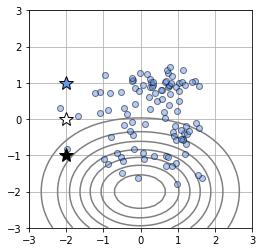

In [19]:
N = X.shape[0]
K = 3
Pi = np.array([0.33, 0.33, 0.34]) #가우스의 크기
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]]) 
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]
#모든 데이터를 0번째 카테고리에 속한다고 가정

X_col=np.array([[0.4, 0.6, 0.95], [1, 1, 1], [0, 0, 0]])
# X_col = ['cornflowerblue', 'black', 'white']

# 데이터를 그리기 ------------------------------
def show_mixgauss_prm(x, gamma, pi, mu, sigma):
    N, D = x.shape
    show_contour_mixgauss(pi, mu, sigma)
    for n in range(N):
        col=gamma[n,0]*X_col[0]+gamma[n,1]*X_col[1]+gamma[n,2]*X_col[2]
#부담률 (가우스에 속할 확률) * 색깔을 함으로서 포함될 확률을 색깔의 명암으로 표현하였다.
        plt.plot(x[n, 0], x[n, 1], 'o',
                 color=tuple(col), markeredgecolor='black',
                 markersize=6, alpha=0.5)
    for k in range(K):
        plt.plot(mu[k, 0], mu[k, 1], marker='*',
                 markerfacecolor=tuple(X_col[k]), markersize=15,
                 markeredgecolor='k', markeredgewidth=1)
        
        
    plt.grid(True)


plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

공분산 행렬이 3차원인 이유: 공분산을 두번 고려해야하기 때문이다.       
다른 가우스 군집화와 데이터 사이의 거리도 생각해야되서 공분산이 3차원이 되었다.    
- 0번위치의 가우스에서 데이터가 차지하는 높이, 1번위치의 가우스에서의 높이, 2번위치에서 높이 등등

기댓값 최대화 알고리즘(expectation-maximization algorithm, 약자 EM 알고리즘)은 관측되지 않는 잠재변수에 의존하는 확률 모델에서 최대가능도(maximum likelihood)나 최대사후확률(maximum a posteriori, 약자 MAP)을 갖는 모수의 추정값을 찾는 반복적인 알고리즘이다. EM 알고리즘은 모수에 관한 추정값으로 로그가능도(log likelihood)의 기댓값을 계산하는 기댓값 (E) 단계와 이 기댓값을 최대화하는 모수 추정값들을 구하는 최대화 (M) 단계를 번갈아가면서 적용한다. 

쉽게 생각하기: 평균과 분산을 이용하여 클러스터링을 한 뒤, 갱신을 하기   
다만, 로그우도를 커지는 방향으로 갱신하기

E단계: 부담률을 구하는 단계이다. 어떤 가우시안에 속하는 지 구하는 단계이다.

- "가우스 함수의 값이 높아질수록 부담률도 높아진다"는 직관적 갱신 방법 활용
- 가우시안의 크기 * 특정가우시안에서 데이터가 차지하는 높이 /    
  (카테고리별 가우시안의 크기 * 카테고리에 따른 가우시안의 높이의 총합)

데이터를 a가우스에 넣은 값/ 데이터를 a가우스에 넣은 값+ 데이터를 b가우스에 넣은값 + 데이터를 c가우스에 넣은 값   

대신 3개의 가우스가 무조건 같으리란 보장이 없기 때문에 상대적인 크기도 고려하게 된다. 

0번째 가우스의 크기 * 0번재 가우스에서 데이터가 차지한 높이     /    
(0번째 가우스의 크기 * 0번재 가우스에서 데이터가 차지한 높이 + 1번째 가우스의 크기 * 1번재 가우스에서 데이터가 차지한 높이                  <br>+ 2번째 가우스의 크기 * 2번재 가우스에서 데이터가 차지한 높이) 

In [20]:
def e_step_mixgauss(x, pi, mu, sigma):
    N, D = x.shape
    K = len(pi)
    y = np.zeros((N, K))
    for k in range(K):
        y[:, k] = gauss(x, mu[k, :], sigma[k, :, :]) # KxN
    gamma = np.zeros((N, K))
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = pi[k] * y[n, k]
        gamma[n, :] = wk / np.sum(wk)
    return gamma


# 메인 ----------------------------------
Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)

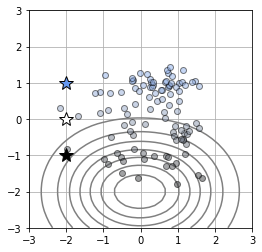

In [21]:
plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

M 단계 새롭게 갱신을 한다.

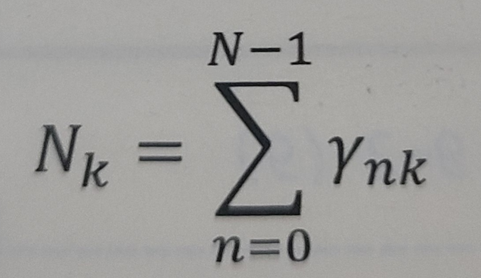

클러스터 안에서 부담률의 합을 구합니다. 0번쨰 클러스터는 0번째끼리 1번째는 1번째끼리, 2번째는 2번째끼리 부담률의 합을 구함

r = [확률1 확률2 확률3]

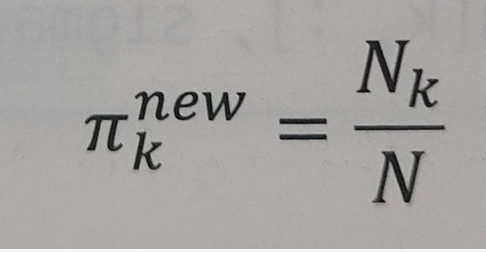

혼합률을 갱신   
혼합률: 전체에 대한 클러스터 내 수의 비율(N:전체 데이터 수)  -> 클러스터 끼리의 부담률의 합 / 데이터의 개수

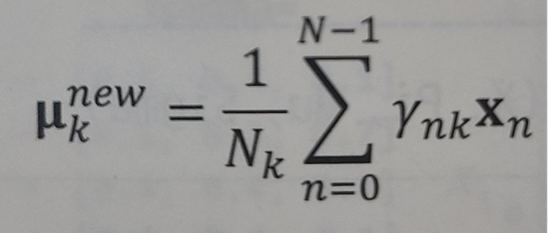

평균을 새롭게 갱신한다.  

- 데이터 * 데이터 가속하는 카테고리에 해당하는 부담률 / 카테고리에 해당하는 부담률의 합
- 아까 KNN에서도 거리의 평균을 이용하여 새로운 점을 갱신한 것을 생각하면 된다.

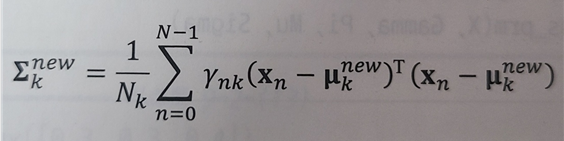

새로운 평균을 토대로 분산을 구하기

In [30]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(np.sum(a, axis = 0))

[5 7 9]


In [33]:
def m_step_mixgauss(x, gamma):
    N, D = x.shape
    N, K = gamma.shape # 100, 3
    # pi를 계산
    pi = np.sum(gamma, axis=0) / N
    # mu을 계산
    mu = np.zeros((K, D))
    for k in range(K):
        for d in range(D):
            mu[k, d] = np.dot(gamma[:, k], x[:, d]) / np.sum(gamma[:, k])
    # sigma를 계산
    sigma = np.zeros((K, D, D))
    for k in range(K):
        for n in range(N):
            wk = x - mu[k, :]
            wk = wk[n, :, np.newaxis] #sigma가 3차원이라 새로운 축을 만들었다.
            sigma[k, :, :] = sigma[k, :, :] + gamma[n, k] * np.dot(wk, wk.T)
        sigma[k, :, :] = sigma[k, :, :] / np.sum(gamma[:, k])
    return pi, mu, sigma


# 메인 ----------------------------------
Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)

100 3


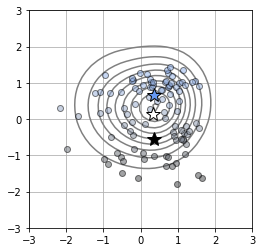

In [23]:
plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

100 3
100 3
100 3
100 3
100 3
100 3
100 3
100 3
100 3
100 3
100 3
100 3
100 3
100 3
100 3
100 3
100 3
100 3
100 3
100 3


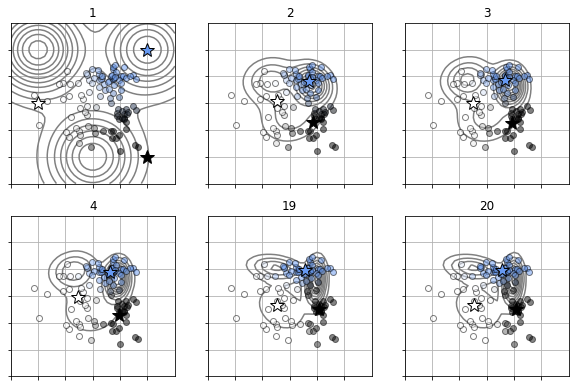

In [34]:
Pi = np.array([0.3, 0.3, 0.4])
Mu = np.array([[2, 2], [-2, 0], [2, -2]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]
plt.figure(1, figsize=(10, 6.5))
max_it = 20 # 반복 횟수


i_subplot=1;
for it in range(0, max_it):
    Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)
    if it<4 or it>17:
        plt.subplot(2, 3, i_subplot)
        show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
        plt.title("{0:d}".format(it + 1))
        plt.xticks(range(X_range0[0], X_range0[1]), "")
        plt.yticks(range(X_range1[0], X_range1[1]), "")
        i_subplot=i_subplot+1
    Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)
plt.show()

최대우도

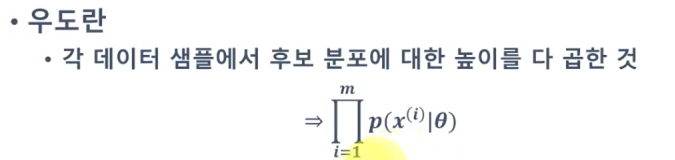

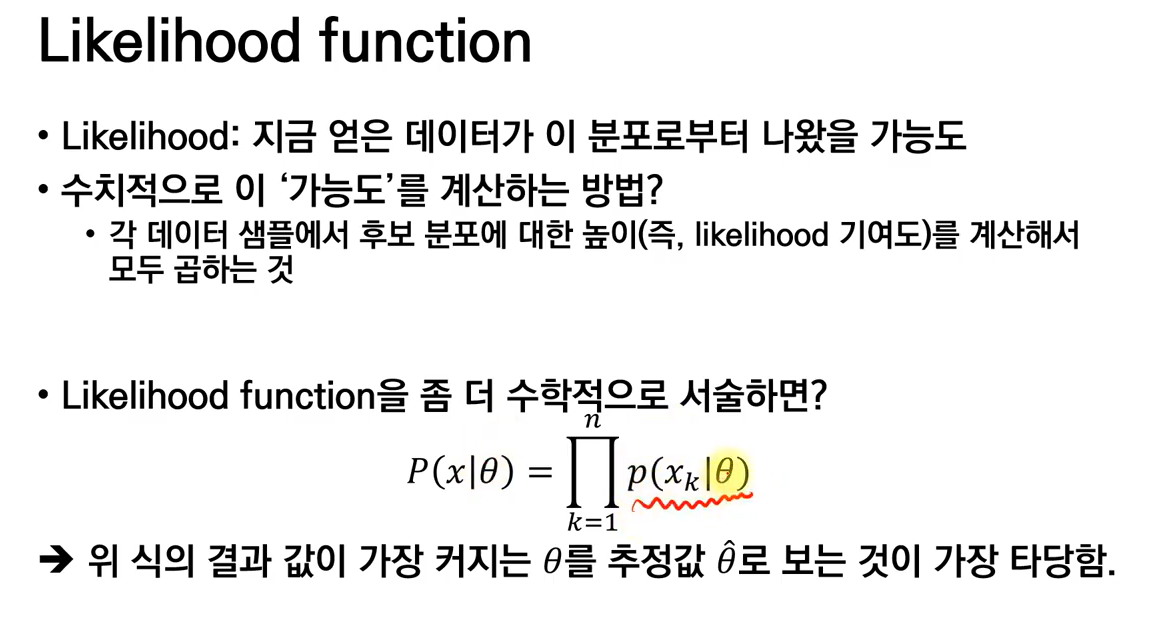

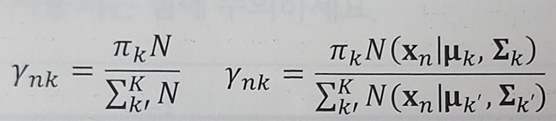

여기서 세타는 평균이 mu_k, 분산이 sigma_k인 가우스 집합이다.    
x라는 데이터가 해당하는 가우스 분포에 속할 확률을 전부다 곱한 것이다

이 로그우도가 제일 커지는 방향으로 가야 클러스터링을 잘했다고 볼 수 있다.  
로그 우도는 왜 커야할까? 사람이 있는데 사람 0.5, 고양이 0.5라고 인식하게 된다면 얼마나 형편없이 구분하는 것인지 알 수 있다.   
그래서 구분을 똑바르게 하는 방향으로 가우스 집단의 평균과 공분산을 갱신해야한다.

In [25]:
def nlh_mixgauss(x, pi, mu, sigma):
    # x: NxD
    # pi: Kx1
    # mu: KxD
    # sigma: KxDxD
    # output lh: NxK
    N, D = x.shape
    K = len(pi)
    y = np.zeros((N, K))
    for k in range(K):
        y[:, k] = gauss(x, mu[k, :], sigma[k, :, :]) # KxN
    lh = 0
    for n in range(N):
        wk = 0
        for k in range(K):
            wk = wk + pi[k] * y[n, k]
        lh = lh + np.log(wk)
    return -lh

[0.37227353 0.34000222 0.28772425]
[0.3823514  0.32895267 0.28869593]
[0.39023582 0.32302787 0.2867363 ]
[0.39564467 0.32250005 0.28185528]
[0.39855462 0.32498372 0.27646165]
[0.39971962 0.32760169 0.27267869]
[0.39979238 0.32928659 0.27092103]
[0.39931558 0.33031201 0.27037241]
[0.39858354 0.33100005 0.27041641]
[0.3977486  0.33152435 0.27072705]
[0.39689596 0.33195663 0.27114741]
[0.39607215 0.33232542 0.27160244]
[0.39530079 0.33264358 0.27205563]
[0.39459235 0.33291849 0.27248917]
[0.39394978 0.33315554 0.27289468]
[0.39337193 0.33335929 0.27326878]
[0.39285539 0.33353384 0.27361076]
[0.39239569 0.33368292 0.27392139]
[0.39198789 0.33380988 0.27420223]
[0.39162702 0.33391774 0.27445524]
[426.22 229.86 224.32 220.8  218.63 216.93 215.93 215.51 215.33 215.24
 215.18 215.15 215.13 215.11 215.1  215.1  215.09 215.09 215.08 215.08]


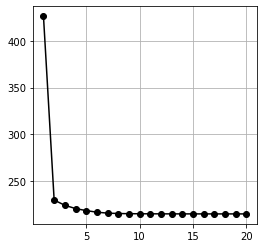

In [26]:
Pi = np.array([0.3, 0.3, 0.4])
Mu = np.array([[2, 2], [-2, 0], [2, -2]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]


max_it = 20
it = 0
Err = np.zeros(max_it) # distortion measure
for it in range(0, max_it):
    Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)
    Err[it] = nlh_mixgauss(X,Pi,Mu,Sigma)
    Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)


print(np.round(Err, 2))
plt.figure(2, figsize=(4, 4))
plt.plot(np.arange(max_it) + 1,
Err, color='k', linestyle='-', marker='o')
#plt.ylim([40, 80])
plt.grid(True)
plt.show()